In [114]:
import numpy as np
import pandas as pd
from sklearn.model_selection import *
from sklearn import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import *
from sklearn import *
from sklearn.metrics import *
from mnist import *
from pandas import *
from datetime import date
from collections import namedtuple
import cv2
from sklearn.feature_extraction.text import *
from sklearn.naive_bayes import *
from sklearn.metrics import *
from scipy import *
from sklearn.metrics import confusion_matrix
import itertools
import os
from keras.utils.np_utils import * 
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.preprocessing.image import *
from keras.callbacks import *
from skimage.filters import threshold_local


In [115]:
homePath_train = "/home/giang/Desktop/ThucTap/Tuan3/data/"

In [116]:
chars = ['0', '1']
chars

['0', '1']

In [117]:
# ham xu li du lieu
def preprocessdata(homePath):
    data=[]
    label=[]
    for i,char in enumerate(chars):
        imgPath = homePath + char + "/"
        print(imgPath)
        imgFiles = os.listdir(imgPath)
#         kk = 0
        for image in imgFiles:
   
            img = cv2.imread(imgPath + image,0)
            img = cv2.resize(img, (28, 28))
            
#             print(img.shape)
#             noise_removal = cv2.bilateralFilter(img,9,75,75)

#             equal_histogram = cv2.equalizeHist(noise_removal)
#             img_pad = np.zeros([28, 28])
#             img_pad[6:26, 3:23] = img
            data.append(img)
            label.append(i)

    l = len(label)
    shutfle = list(range(l))
    random.shuffle(shutfle)
    train_data = np.array(data)
    train_label = np.array(label)
    train_data = train_data[shutfle]
    train_label = train_label[shutfle]
    return data,label

In [118]:
data,label = preprocessdata(homePath_train)

/home/giang/Desktop/ThucTap/Tuan3/data/0/
/home/giang/Desktop/ThucTap/Tuan3/data/1/


In [119]:
x = data
y = label

In [120]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
y_tt = y_test

In [121]:
X_train = reshape(X_train,(-1,28,28,1))
y_train = to_categorical(y_train, num_classes = 2)
X_test = reshape(X_test,(-1,28,28,1))
y_test = to_categorical(y_test, num_classes = 2)

<ipython-input-121-c4f5b2067eb1>:1: DeprecationWarning: scipy.reshape is deprecated and will be removed in SciPy 2.0.0, use numpy.reshape instead
  X_train = reshape(X_train,(-1,28,28,1))
<ipython-input-121-c4f5b2067eb1>:3: DeprecationWarning: scipy.reshape is deprecated and will be removed in SciPy 2.0.0, use numpy.reshape instead
  X_test = reshape(X_test,(-1,28,28,1))


In [122]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])
# model.summary()
# res = model.fit(X_train, y_train, validation_split=0.2,shuffle=True,
#                  batch_size=32, epochs=100, verbose=1)

# model.save("b2_t3_.h5")
model.load_weights("b2_t3_.h5")

In [123]:
score = model.evaluate(X_test, y_test, verbose=0)
score

[0.4475735650820161, 0.931405246257782]

In [124]:
results = chars.copy()

In [125]:
# model = Sequential()
# model = create_model()

img_ = cv2.imread("/home/giang/Pictures/anhtest27.png", 0)
X_test__ = cv2.resize(img_, (28, 28))

In [126]:
y_predict = model.predict(X_test__.reshape(1,28,28,1))
test_logits = np.argmax(y_predict, axis=-1)
res__ = results[int(test_logits)]
res__

'1'

In [127]:
kq = model.predict(X_test)
kq

array([[6.5260589e-01, 3.4739405e-01],
       [9.7236950e-03, 9.9027634e-01],
       [8.0865246e-01, 1.9134749e-01],
       ...,
       [6.4149940e-01, 3.5850063e-01],
       [1.0674684e-03, 9.9893254e-01],
       [1.0000000e+00, 2.5505559e-12]], dtype=float32)

In [128]:
resS = np.argmax(kq, axis=-1)
resS

array([0, 1, 0, ..., 0, 1, 0])

In [129]:
print(classification_report(y_tt, resS, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1334
           1       0.94      0.93      0.93      1363

    accuracy                           0.93      2697
   macro avg       0.93      0.93      0.93      2697
weighted avg       0.93      0.93      0.93      2697



In [139]:
im = cv2.imread("/home/giang/Pictures/anhtest3.jpg", 1)
# im = cv2.resize(im, (800, 800))

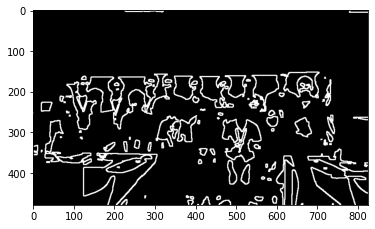

In [140]:
im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

noise_removal = cv2.bilateralFilter(im_gray,9,75,75)

equal_histogram = cv2.equalizeHist(noise_removal)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
morph_image = cv2.morphologyEx(equal_histogram,cv2.MORPH_OPEN,kernel,iterations=20)

sub_morp_image = cv2.subtract(equal_histogram,morph_image)
ret,thresh_image = cv2.threshold(sub_morp_image,0,255,cv2.THRESH_OTSU)

canny_image = cv2.Canny(thresh_image,250,255)
kernel = np.ones((3,3), np.uint8)
dilated_image = cv2.dilate(canny_image,kernel,iterations=1)
plt.imshow(cv2.cvtColor(dilated_image,cv2.COLOR_BGR2RGB))
plt.show()

In [142]:
contours, hierarchy = cv2.findContours(dilated_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours= sorted(contours, key = cv2.contourArea, reverse = True)
screenCnt = None
roi_img = []
check = 0
for c in contours:
    peri = cv2.arcLength(c, True) 
#     print(peri)
    if(peri < 101):
        continue
        
    approx = cv2.approxPolyDP(c, 0.06 * peri, True) 
    if len(approx) == 4:
        screenCnt = approx
        (x,y,w,h) = cv2.boundingRect(screenCnt)
        roi = im[y:y+h,x:x+w]
        roi_img.append(roi)
#         plt.imshow(cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))
#         plt.show()
        roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        X_test__ = cv2.resize(roi, (28, 28))
        y_predict = model.predict(X_test__.reshape(1,28,28,1))
#         print(" y predict", y_predict)
        test_logits = np.argmax(y_predict, axis=-1)
        res__ = results[int(test_logits)]

        if(res__ == '1'):
            check = 1
            plt.imshow(cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))
            plt.show()
#             print("anh co chua 22 ban do")
            break

# print(check)
if(check == 1):
    print("anh co chua ban do")
else:
    print("anh khong chua ban do")

1243.276253938675
530.1736603975296
654.2741659879684
1629.3666582107544
357.2792179584503
412.1492750644684
552.8183218240738
597.4629833698273
1404.5138407945633
340.4091612100601
396.7766921520233
271.33809328079224
309.2375886440277
238.61017155647278
306.65180134773254
339.5218586921692
437.9482640028
397.2203427553177
256.99494755268097
199.53910386562347
264.30865585803986
173.88224959373474
163.53910386562347
235.13708233833313
302.79393684864044
232.16652047634125
190.85281205177307
304.7523069381714
209.0538226366043
563.4213538169861
143.78174436092377
150.32590067386627
127.49747383594513
152.81118166446686
191.0538228750229
182.5096673965454
132.9116871356964
97.55634891986847
161.74011433124542
108.32590079307556
128.76955199241638
368.56854140758514
78.18376612663269
78.3847758769989
85.8406194448471
94.28427076339722
77.35533845424652
70.87005722522736
93.94112479686737
73.94112527370453
65.79898953437805
68.04162991046906
71.11269783973694
60.38477599620819
207.6984843